# Global Power Plant Database

<strong>Problem Statement:</strong>

<strong>Description</strong>

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Key attributes of the database
The database includes the following indicators:

- `country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
- `country_long` (text): longer form of the country designation
- `name` (text): name or title of the power plant, generally in Romanized form
- `gppd_idnr` (text): 10 or 12 character identifier for the power plant
- `capacity_mw` (number): electrical generating capacity in megawatts
- `latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- `longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- `primary_fuel` (text): energy source used in primary electricity generation or export
- `other_fuel1` (text): energy source used in electricity generation or export
- `other_fuel2` (text): energy source used in electricity generation or export
- `other_fuel3` (text): energy source used in electricity generation or export
- `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
- `owner` (text): majority shareholder of the power plant, generally in Romanized form
- `source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
- `url` (text): web document corresponding to the `source` field
- `geolocation_source` (text): attribution for geolocation information
- `wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
- `year_of_capacity_data` (number): year the capacity information was reported
- `generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
- `generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
- `generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
- `generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
- `generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
- `generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
- `generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
- `generation_data_source` (text): attribution for the reported generation information
- `estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
- `estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
- `estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
- `estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
- `estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
- 'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
- `estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
- `estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
- `estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
- `estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

# Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories. 

Prediction :   

Make two prediction  
- 1) Primary Fuel    
- 2) capacity_mw 

In [468]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None) # Required to display all columns

In [469]:
df=pd.read_csv(r'https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [470]:
df.shape

(907, 27)

# Check for null values

In [471]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [472]:
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total Count', '% of Missing Data'])
missing_data.head(5)

,Total Count,% of Missing Data
estimated_generation_gwh,907,100.0
other_fuel3,907,100.0
wepp_id,907,100.0
generation_gwh_2013,907,100.0
generation_gwh_2019,907,100.0


We notice that few columns are fully empty and other_Fuel2 has only one data, Hence we should not have even secod thought to keep these columns, Lets drop them straight away.

In [473]:
df.drop(['estimated_generation_gwh','other_fuel2','other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019'],axis=1,inplace=True)

In [474]:
df.head(2)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [475]:
df.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
other_fuel1               709
commissioning_year        380
owner                     565
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

# Handle Missing Data

In [476]:
df['other_fuel1'].value_counts()

Oil             195
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

Out of 907 records, we have data for 198 records only, even if we fill the Other_fuel as Oil this will not give us anything as data will be highly imbalanced in this column, So we will take a note to delete this column too and meanwhile we will see the other columns which are having missing data

In [477]:
df.head(2)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [478]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 907 non-null    object 
 1   country_long            907 non-null    object 
 2   name                    907 non-null    object 
 3   gppd_idnr               907 non-null    object 
 4   capacity_mw             907 non-null    float64
 5   latitude                861 non-null    float64
 6   longitude               861 non-null    float64
 7   primary_fuel            907 non-null    object 
 8   other_fuel1             198 non-null    object 
 9   commissioning_year      527 non-null    float64
 10  owner                   342 non-null    object 
 11  source                  907 non-null    object 
 12  url                     907 non-null    object 
 13  geolocation_source      888 non-null    object 
 14  year_of_capacity_data   519 non-null    fl

In [479]:
df_lat=df[df['latitude'].isna()]
df_lat.shape

(46, 21)

In [480]:
df_lat.head(2)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
14,IND,India,ANOOPGARH ST I&II,IND0000012,9.0,NaN,NaN,Hydro,NaN,1987.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,NaN,NaN,NaN,NaN,NaN,NaN
25,IND,India,Abhijeet,WRI1020238,50.0,NaN,NaN,Solar,NaN,2015.0,Ener-t International Ltd.,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- We know that imputing missing data with <b>mean</b> values can only be done with numerical data.


- Another technique is median imputation in which the missing values are replaced with the median value of the entire feature column. When the data is skewed, it is good to consider using the median value for replacing the missing values.We must note that imputing missing data with <b>median</b> value can only be done with numerical data.


- Yet another technique is mode imputation in which the missing values are replaced with the mode value or most frequent value of the entire feature column. When the data is skewed, it is good to consider using <b>mode</b> values for replacing the missing values.We must note that imputing missing data with mode values can be done with numerical and categorical data.

<AxesSubplot:xlabel='latitude', ylabel='Count'>

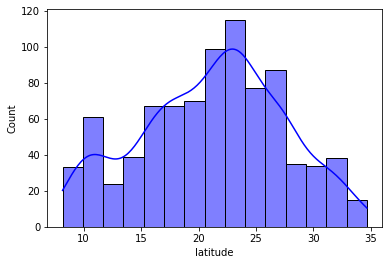

In [481]:
sns.histplot(df.latitude,color="blue",kde=True,stat="count")

<AxesSubplot:xlabel='longitude', ylabel='Count'>

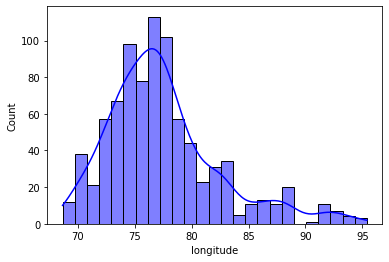

In [482]:
sns.histplot(df.longitude,color="blue",kde=True,stat="count")

In [483]:
df['latitude'].skew()

-0.14586567454259747

In [484]:
df['longitude'].skew()

1.1126462921331153

We notice that latitude is left skewed and longitude is right skewed, hence lets use median to replace the missing values and lets fill geolocation_source with mode as it is a categorical column

In [485]:
df['latitude']=df['latitude'].fillna(df['latitude'].median())
df['longitude']=df['longitude'].fillna(df['longitude'].median())
df['geolocation_source']=df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])

In [486]:
df.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
other_fuel1               709
commissioning_year        380
owner                     565
source                      0
url                         0
geolocation_source          0
year_of_capacity_data     388
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

In [487]:
df_commissionYear=df[df['commissioning_year'].isna()]
df_commissionYear.shape

(380, 21)

Looking at the record, we see that we have commision year from 1927 to 2018 it is impossible to find the year of commission until we see the actual records. We will keep a note to delete this column too

In [488]:
df['owner'].describe()

count                               342
unique                              280
top       Sterling Agro Industries ltd.
freq                                  4
Name: owner, dtype: object

In a total reord of 907, we have data for 342 reocord and out of these 342, there are 280 unique names, so this column will give us nothing in return, we can delete this column too and do feature_enegineering further

In [489]:
df['gppd_idnr'].describe()

count            907
unique           907
top       WRI1019990
freq               1
Name: gppd_idnr, dtype: object

In [490]:
set(df['generation_data_source'])

{'Central Electricity Authority', nan}

In [491]:
set(df['geolocation_source'])

{'Industry About', 'National Renewable Energy Laboratory', 'WRI'}

In [492]:
df['url'].describe()

count                        907
unique                       304
top       http://www.cea.nic.in/
freq                         519
Name: url, dtype: object

In [493]:
df['source'].describe()

count                               907
unique                              191
top       Central Electricity Authority
freq                                519
Name: source, dtype: object

In [494]:
df['year_of_capacity_data'].describe()

count     519.0
mean     2019.0
std         0.0
min      2019.0
25%      2019.0
50%      2019.0
75%      2019.0
max      2019.0
Name: year_of_capacity_data, dtype: float64

year_of_Capacity has either no value or has 2019, so its safe to delete this column too.

In [495]:
df['generation_gwh_2014'].describe()

count      398.000000
mean      2431.823590
std       4026.440035
min          0.000000
25%        223.557672
50%        801.123775
75%       3035.306250
max      28127.000000
Name: generation_gwh_2014, dtype: float64

In [496]:
df['generation_gwh_2015'].describe()

count      422.000000
mean      2428.226946
std       4194.596959
min          0.000000
25%        176.381063
50%        711.181225
75%       3084.121250
max      30539.000000
Name: generation_gwh_2015, dtype: float64

In [497]:
df['generation_gwh_2016'].describe()

count      434.000000
mean      2467.936859
std       4162.884308
min          0.000000
25%        188.285252
50%        737.205450
75%       3282.861313
max      30015.000000
Name: generation_gwh_2016, dtype: float64

In [498]:
df['generation_gwh_2017'].describe()

count      440.000000
mean      2547.759305
std       4196.991169
min          0.000000
25%        177.874930
50%        817.977250
75%       3275.690475
max      35116.000000
Name: generation_gwh_2017, dtype: float64

In [499]:
df['generation_gwh_2018'].describe()

count      448.000000
mean      2600.804099
std       4314.880456
min          0.000000
25%        193.378250
50%        751.644375
75%       3143.535900
max      35136.000000
Name: generation_gwh_2018, dtype: float64

In [500]:
set(df['country']),set(df['country_long'])

({'IND'}, {'India'})

In [501]:
df['name'].describe()

count                  907
unique                 907
top       ACME Solar Tower
freq                     1
Name: name, dtype: object

Looks like the columns with maximum null value or single values will fetch us nothing, so its better to delete and proceed with our analysis further. Moreover, we see that all data are for Country India, where it has been repeated twice as county for code and country_long for name of the country. This column will not give us anything, so lets delete that too.
Also generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017 and generation_gwh_2018 have many null values and dealing with mean will give no justice to these columns and the model can't get anything from these columns, so we are deleting them too

Also , there are 907 records and 907 names, so it will also be 0% useful for us, Hence we will delete this column too.

In [502]:
df.drop(['country','country_long','name','gppd_idnr','other_fuel1','owner','url','year_of_capacity_data','commissioning_year','generation_gwh_2014', 'generation_gwh_2015','generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018','generation_data_source'],axis=1,inplace=True)

In [503]:
#commissioning_Year : year of plant operation, weighted by unit-capacity when data is available
df.head(2)


,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source
0,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,98.0,24.7663,74.6090,Coal,Ultratech Cement ltd,WRI


<AxesSubplot:xlabel='capacity_mw', ylabel='Count'>

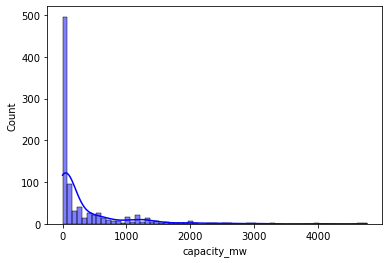

In [504]:
sns.histplot(df.capacity_mw,color="blue",kde=True,stat="count")

<AxesSubplot:xlabel='latitude', ylabel='Count'>

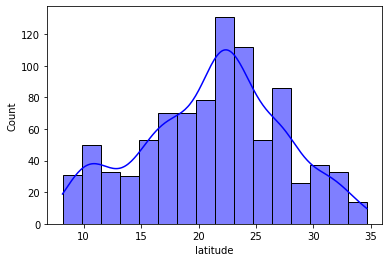

In [505]:
sns.histplot(df.latitude,color="blue",kde=True,stat="count")

<AxesSubplot:xlabel='longitude', ylabel='Count'>

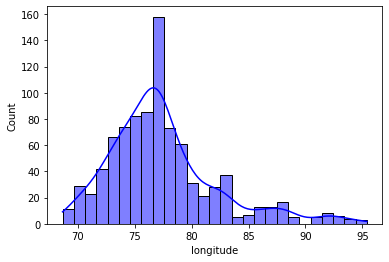

In [506]:
sns.histplot(df.longitude,color="blue",kde=True,stat="count")

In [507]:
set(df['primary_fuel'])

{'Biomass', 'Coal', 'Gas', 'Hydro', 'Nuclear', 'Oil', 'Solar', 'Wind'}

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

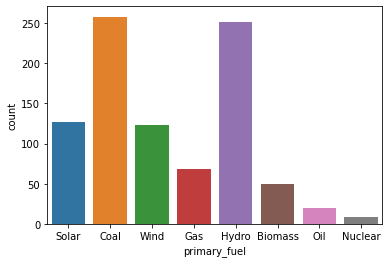

In [508]:
sns.countplot(df['primary_fuel'])

<AxesSubplot:xlabel='geolocation_source', ylabel='count'>

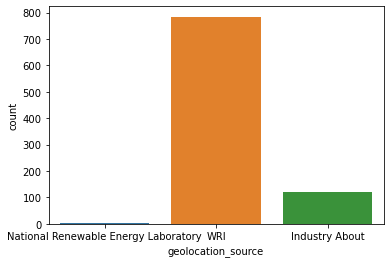

In [509]:
sns.countplot(df['geolocation_source'])

In [510]:
df.isnull().sum()

capacity_mw           0
latitude              0
longitude             0
primary_fuel          0
source                0
geolocation_source    0
dtype: int64

# Check for Duplicates

In [511]:
duplicate = df[df.duplicated(keep = 'last')]
print("Duplicate Rows :")
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source
14,9.00,21.7800,76.7195,Hydro,Central Electricity Authority,WRI
25,50.00,21.7800,76.7195,Solar,National Renewable Energy Laboratory,WRI
178,5.00,21.7800,76.7195,Hydro,Central Electricity Authority,WRI
222,77.65,31.2680,76.4920,Hydro,Central Electricity Authority,WRI
254,36.00,15.2615,76.3379,Hydro,Central Electricity Authority,WRI
483,4.00,21.7800,76.7195,Hydro,Central Electricity Authority,WRI
655,22.50,21.7800,76.7195,Wind,CDM,WRI
705,6.60,21.7800,76.7195,Hydro,Central Electricity Authority,WRI


In [512]:
df.drop_duplicates(keep=False,inplace=True)

In [513]:
duplicate = df[df.duplicated(keep = 'last')]
print("Duplicate Rows :")
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source


Now, have no duplicates in our data, lets proceed further...

In [514]:
df.shape

(891, 6)

# Categorical Columns

Now, lets see how many columns are categorical, note that we need to keep region as target variable for next task

In [515]:
categorical_columns=[x for x in df.dtypes.index if df.dtypes[x]=='object']
categorical_columns

['primary_fuel', 'source', 'geolocation_source']

In [516]:
df.head(4)

,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source
0,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,98.0,24.7663,74.6090,Coal,Ultratech Cement ltd,WRI
2,39.2,21.9038,69.3732,Wind,CDM,WRI
3,135.0,23.8712,91.3602,Gas,Central Electricity Authority,WRI


With heavy heart, lets delete the column source also, as it is also not contributing anything to our dataset, it is just an organisation name reporting the data

In [517]:
df.drop(columns=['source'],axis=1,inplace=True)

In [518]:
df.head(4)

,capacity_mw,latitude,longitude,primary_fuel,geolocation_source
0,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory
1,98.0,24.7663,74.6090,Coal,WRI
2,39.2,21.9038,69.3732,Wind,WRI
3,135.0,23.8712,91.3602,Gas,WRI


In [519]:
set(df['geolocation_source'])

{'Industry About', 'National Renewable Energy Laboratory', 'WRI'}

We have two three type of geolocation_source, 

- a) Industry About 
- b) National Renewable Energy Laboratory
- c) WRI

Lets check the count of these three  geolocation_source.

<AxesSubplot:xlabel='geolocation_source', ylabel='count'>

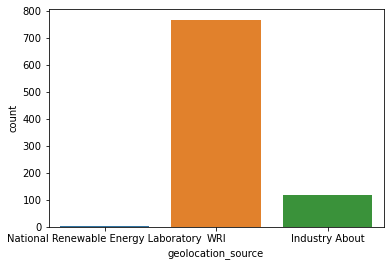

In [520]:
sns.countplot(df['geolocation_source'])

In [521]:
print('Count of geolocation_source')
print("Total number of geolocation_source : ",df['geolocation_source'].nunique())
geolocation_source_counts = df['geolocation_source'].value_counts()
geolocation_source_counts

Count of geolocation_source
Total number of geolocation_source :  3


WRI                                     768
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [522]:
print('Count of primary_fuel')
print("Total number of primary_fuel : ",df['primary_fuel'].nunique())
primary_fuel_counts = df['primary_fuel'].value_counts()
primary_fuel_counts

Count of primary_fuel
Total number of primary_fuel :  8


Coal       258
Hydro      239
Solar      125
Wind       121
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

In [523]:
import plotly.offline as py
import plotly.graph_objs as go
geolocationSource=[geolocation_source_counts['Industry About'],
       geolocation_source_counts['National Renewable Energy Laboratory'],
       geolocation_source_counts['WRI']
      ]
data_label=['Industry About', 'National Renewable Energy Laboratory', 'WRI']

geolocationSource_pieChart=go.Pie(labels=data_label,values=geolocationSource)
py.iplot([geolocationSource_pieChart])

Only 2.81% data are Organic and remaining 97.2% data is conventional. So this column will not have any major impact on our data, if we drop this also, it will not impact to our data.

Also, we have divided Date into Month, year and date. So there is no point in keeping the date column.

For now, we can delete the region column also, as we will use this for data analysis further for the classification problem

In [65]:
primary_fuel_counts

Coal       258
Hydro      239
Solar      125
Wind       121
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

In [66]:
primaryFuel=[primary_fuel_counts['Coal'],primary_fuel_counts['Hydro'],primary_fuel_counts['Solar'],
             primary_fuel_counts['Wind'],primary_fuel_counts['Gas'],primary_fuel_counts['Biomass'],
             primary_fuel_counts['Oil'],primary_fuel_counts['Nuclear']
      ]
data_label=['Coal','Hydro','Solar','Wind','Gas','Biomass','Oil','Nuclear']

primaryFuel_pieChart=go.Pie(labels=data_label,values=primaryFuel)
py.iplot([primaryFuel_pieChart])

Coal has the most percentage available in  our dataset, followed by Hydro as the primary fuel

In [68]:
data = [df]
geolocationSources = {"Industry About":0,"National Renewable Energy Laboratory":1, "WRI":2}

for dataset in data:
    dataset['geolocation_source'] = dataset['geolocation_source'].map(geolocationSources)

In [69]:
df['geolocation_source'].astype(int)

0      1
1      2
2      2
3      2
4      2
      ..
902    2
903    0
904    2
905    2
906    2
Name: geolocation_source, Length: 891, dtype: int32

In [70]:
df.head(2)

,capacity_mw,latitude,longitude,primary_fuel,geolocation_source
0,2.5,28.1839,73.2407,Solar,1
1,98.0,24.7663,74.6090,Coal,2


In [71]:
dataToPlot=df.drop(columns=['primary_fuel'],axis=1)
dataToPlot

,capacity_mw,latitude,longitude,geolocation_source
0,2.5,28.1839,73.2407,1
1,98.0,24.7663,74.6090,2
2,39.2,21.9038,69.3732,2
3,135.0,23.8712,91.3602,2
4,1800.0,21.9603,82.4091,2
...,...,...,...,...
902,1600.0,16.2949,77.3568,2
903,3.0,12.8932,78.1654,0
904,25.5,15.2758,75.5811,2
905,80.0,24.3500,73.7477,2


In [72]:
dataToPlot.shape

(891, 4)

In [73]:
targetToPlot=df.loc[:, df.columns == 'primary_fuel']
targetToPlot.head(2)

,primary_fuel
0,Solar
1,Coal


# Skewness

In [74]:
#Check Data Skewness
skew_df=pd.DataFrame({'Skewness':df.skew()}) 
skew_df

,Skewness
capacity_mw,3.092934
latitude,-0.164486
longitude,1.145268
geolocation_source,-2.129725


In [75]:
print("Out of",len(df.skew()),"features",len(df.skew().loc[abs(df.skew())>0.5]) ,"are skewed")

Out of 4 features 3 are skewed


In [76]:
skewed_feature=skew_df.iloc[(np.where(abs(skew_df['Skewness'])>0.5))]
skewed_feature

,Skewness
capacity_mw,3.092934
longitude,1.145268
geolocation_source,-2.129725


In [77]:
dataToPlot.shape

(891, 4)

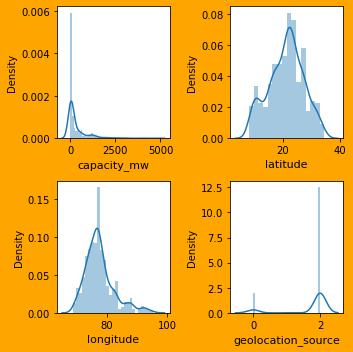

In [78]:
#Lets see data distribution using distplot
plt.figure(figsize=(5,5),facecolor='orange')
graph=1

for column in dataToPlot:
    
    if graph<=4:
        ax=plt.subplot(2,2,graph)        
        sns.distplot(dataToPlot[column])
        plt.xlabel(column,fontsize=11)
        
    graph+=1   
    
plt.tight_layout()

We see that all columns are skewed right and is not normally distributed, So lets handle this using Log1P transformation to deal with the skewness

# Log1P Transformation to deal with Skewness

In [79]:
import numpy as np
for index in df.skew().index:
    if df.skew().loc[index]>0.5:
        df[index]=np.log1p(df[index])
    if df.skew().loc[index]<-0.5:
        df[index]=np.square(df[index])
print(df.skew())
print("Out of",len(df.skew()),"features",len(df.skew().loc[abs(df.skew())>0.5]) ,"is skewed but improved skewness value than previous skewness values")

capacity_mw           0.115150
latitude             -0.164486
longitude             0.943632
geolocation_source   -2.110606
dtype: float64
Out of 4 features 2 is skewed but improved skewness value than previous skewness values


So we have solved the skewness issue to most extent

# Outliers
Lets Plot the Boxplot to deal with the Outliers

In [80]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'geolocation_source'],
      dtype='object')

Text(0.5, 0, 'capacity_mw')

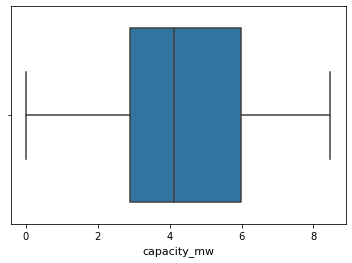

In [81]:
sns.boxplot(df['capacity_mw'])
plt.xlabel('capacity_mw',fontsize=11)

The minimum Average Price is 0.440000 and maximum is 3.25, The range between q1 and q3 is 1.1 to 1.66. So here we see there are few outliers. In pther words few Avacado fruits have high prices

Text(0.5, 0, 'latitude')

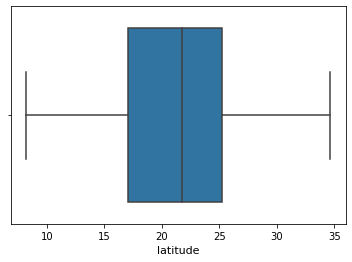

In [82]:
sns.boxplot(df['latitude'])
plt.xlabel('latitude',fontsize=11)

Total Volumne is present within acceptable limits

Text(0.5, 0, 'longitude')

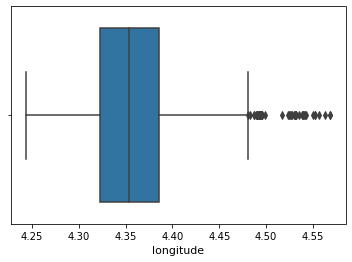

In [83]:
sns.boxplot(df['longitude'])
plt.xlabel('longitude',fontsize=11)

Total number of avocados with PLU 4046 sold is present within acceptable limits

Text(0.5, 0, 'geolocation_source')

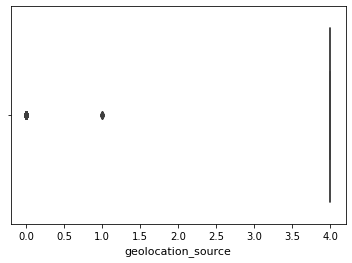

In [84]:
sns.boxplot(df['geolocation_source'])
plt.xlabel('geolocation_source',fontsize=11)

We see that longitude has few outliers

In [85]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['primary_fuel'] = le.fit_transform(df['primary_fuel'])

df['primary_fuel'].value_counts

<bound method IndexOpsMixin.value_counts of 0      6
1      1
2      7
3      2
4      1
      ..
902    1
903    6
904    7
905    1
906    7
Name: primary_fuel, Length: 891, dtype: int32>

In [86]:
#Import zscore
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape

(891, 5)

In [87]:
threshold=3
print(np.where(z>3))

(array([176, 180, 328, 410, 421, 510, 567, 628, 802], dtype=int64), array([2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64))


In [88]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(891, 5)
(882, 5)


In [89]:
loss_percentage=((891-883)/891)*100
loss_percentage

0.8978675645342313

We can delete this 0.89% data easily and it is within the acceptable limit

In [90]:
df=df_new
df.shape

(882, 5)

# Standard Scaler

In [92]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df)

In [93]:
X_vif=df
X_vif.shape

(882, 5)

In [94]:
x.shape[1]

5

In [95]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif['features']=X_vif.columns

# Let's check the values now
vif

,vif,features
0,1.588004,capacity_mw
1,1.072394,latitude
2,1.198090,longitude
3,1.655995,primary_fuel
4,1.524715,geolocation_source


We see that there is no multicollinearity problem, and we will proceed with model building now

# Select Features and Target

In [96]:
df.head(2)

,capacity_mw,latitude,longitude,primary_fuel,geolocation_source
0,1.252763,28.1839,4.307313,6,1
1,4.595120,24.7663,4.325575,1,4


In [97]:
features=df.drop(['primary_fuel'], axis=1)
target=df[['primary_fuel']]

In [98]:
print((features.shape),(target.shape))

(882, 4) (882, 1)


In [99]:
le=LabelEncoder()
le.fit(target)
target=le.transform(target)
target

array([6, 1, 7, 2, 1, 1, 3, 3, 3, 1, 1, 3, 1, 3, 1, 2, 1, 1, 0, 0, 0, 2,
       1, 1, 6, 7, 6, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 1, 0, 3, 3, 3, 1, 1,
       3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 1, 1, 2, 1, 3, 1, 1, 1, 2, 3, 3, 7,
       7, 1, 0, 0, 5, 1, 1, 1, 3, 1, 3, 1, 0, 3, 3, 3, 1, 3, 3, 3, 1, 1,
       3, 3, 3, 1, 0, 1, 1, 1, 1, 3, 3, 1, 1, 1, 7, 5, 2, 1, 3, 5, 1, 6,
       6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 6, 7, 6, 6, 6, 6, 1,
       3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 3, 3, 3, 3, 0, 6, 6, 7,
       6, 1, 1, 2, 4, 1, 1, 1, 0, 0, 3, 1, 2, 3, 3, 1, 1, 3, 2, 2, 5, 3,
       0, 5, 3, 3, 0, 3, 1, 1, 1, 6, 2, 7, 6, 7, 6, 6, 6, 6, 6, 6, 3, 3,
       7, 2, 7, 7, 7, 7, 1, 2, 7, 2, 7, 1, 2, 3, 2, 2, 3, 1, 3, 2, 1, 7,
       3, 3, 3, 1, 1, 3, 7, 1, 2, 1, 1, 2, 1, 3, 7, 6, 6, 6, 6, 6, 6, 6,
       7, 6, 6, 6, 6, 1, 0, 3, 0, 2, 2, 0, 3, 0, 7, 7, 7, 7, 7, 1, 7, 6,
       1, 2, 3, 3, 1, 7, 1, 1, 3, 1, 1, 7, 6, 6, 3, 0, 3, 1, 1, 1, 1, 1,
       2, 3, 1, 3, 1, 6, 6, 7, 7, 7, 7, 7, 3, 3, 3,

# Feature Importance

In [100]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
feature_rf = RandomForestRegressor()
feature_rf.fit(features,target)

RandomForestRegressor()

In [101]:
print(feature_rf.feature_importances_)

[0.3037858  0.21292014 0.2710226  0.21227146]


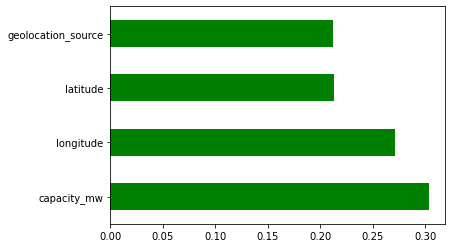

In [102]:
#plot graph of feature importances for better visualization
featureImportance = pd.Series(feature_rf.feature_importances_, index=features.columns)
featureImportance.nlargest(5).plot(kind='barh',color="green")
plt.show()

So we see that capacity_mw is the most important feature, followed by longitude, latitude and geolocation_source

# Train Test Split

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression

# Primary_Fuel Prediction

# Logistic Regression

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
lgr=LogisticRegression()

In [105]:
target.shape, features.shape

((882,), (882, 4))

In [106]:
def get_accuracy_score(model,x,y):
    max_accuracy_score=0
    for i in range(40,100):
        x_train, x_test, y_train, y_test = train_test_split(features,target,test_size=0.20,random_state=i,stratify=target)
        model.fit(x_train,y_train)
        pred_test = model.predict(x_test)
        y_predLR_proba= lgr.predict_proba(x_test)
        roc_auc_score_LR=roc_auc_score(y_test, y_predLR_proba,multi_class='ovr')
        print("At",i,"roc_auc_score is :",roc_auc_score_LR)
        if roc_auc_score_LR>max_accuracy_score:
            max_accuracy_score=roc_auc_score_LR
            final_i=i
    print("At",final_i,"max_accuracy_score is :",max_accuracy_score)
    return final_i

In [107]:
get_accuracy_score(lgr,features,target)

At 40 roc_auc_score is : 0.8254445213194964
At 41 roc_auc_score is : 0.7739526024132408
At 42 roc_auc_score is : 0.8136116144639546
At 43 roc_auc_score is : 0.8429072256654451
At 44 roc_auc_score is : 0.8267099782813511
At 45 roc_auc_score is : 0.8290057554480109
At 46 roc_auc_score is : 0.8444414323844744
At 47 roc_auc_score is : 0.8222818620413614
At 48 roc_auc_score is : 0.8377545468389248
At 49 roc_auc_score is : 0.8333110050685876
At 50 roc_auc_score is : 0.8260325082505624
At 51 roc_auc_score is : 0.8157097094812502
At 52 roc_auc_score is : 0.8200715514074175
At 53 roc_auc_score is : 0.826578548045239
At 54 roc_auc_score is : 0.8207835754848098
At 55 roc_auc_score is : 0.8202995068637504
At 56 roc_auc_score is : 0.8572379696496355
At 57 roc_auc_score is : 0.8135911253884921
At 58 roc_auc_score is : 0.8030937882281028
At 59 roc_auc_score is : 0.8022188338308557
At 60 roc_auc_score is : 0.8132234376793958
At 61 roc_auc_score is : 0.8169207466070846
At 62 roc_auc_score is : 0.849409

78

In [108]:
x_train, x_test, y_train, y_test = train_test_split(features,target,random_state=78,test_size=0.20,stratify=target)
lgr.fit(x_train,y_train)

LogisticRegression()

In [109]:
pred_test = lgr.predict(x_test)

In [110]:
y_predLR_proba= lgr.predict_proba(x_test)
y_predLR_proba

array([[5.01286364e-04, 4.67268839e-02, 1.12003999e-02, ...,
        2.36268276e-03, 9.08962594e-01, 8.68953467e-04],
       [8.61142820e-04, 2.66801404e-04, 1.57122316e-04, ...,
        2.02305588e-04, 9.95653244e-01, 5.62763024e-04],
       [9.80088606e-02, 1.28155540e-01, 5.38944482e-02, ...,
        2.88668100e-02, 5.80752899e-03, 2.55957752e-01],
       ...,
       [7.52657727e-02, 2.08014871e-01, 9.55433567e-02, ...,
        4.20732818e-02, 3.39230924e-03, 2.09274939e-01],
       [3.23214963e-02, 3.65582465e-01, 1.54458567e-01, ...,
        4.55285268e-02, 2.09453399e-03, 1.03985256e-01],
       [2.85637625e-01, 2.30674903e-02, 2.45828874e-02, ...,
        3.22108700e-02, 6.75653571e-04, 5.04215569e-01]])

In [111]:
roc_auc_score_LR=roc_auc_score(y_test, y_predLR_proba,multi_class='ovr')
roc_auc_score_LR

0.8760334246507728

In [112]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score

# classification report
print("Classification Report\n",classification_report(y_test, pred_test))

# confusion matrix
print("Confusion Matrix\n",confusion_matrix(y_test, pred_test))

Classification Report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.52      0.65      0.58        52
           2       0.00      0.00      0.00        13
           3       0.38      0.43      0.40        47
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         4
           6       1.00      1.00      1.00        25
           7       0.39      0.54      0.46        24

    accuracy                           0.52       177
   macro avg       0.29      0.33      0.30       177
weighted avg       0.45      0.52      0.48       177

Confusion Matrix
 [[ 0  0  0  3  0  0  0  7]
 [ 0 34  0 17  0  0  0  1]
 [ 0 13  0  0  0  0  0  0]
 [ 0 15  0 20  0  0  0 12]
 [ 0  2  0  0  0  0  0  0]
 [ 0  2  0  2  0  0  0  0]
 [ 0  0  0  0  0  0 25  0]
 [ 0  0  0 11  0  0  0 13]]


In [118]:
clfLR_cvScore=cross_val_score(lgr,features,target,cv=5,scoring='roc_auc_ovr').mean()
clfLR_cvScore

0.8262749604235724

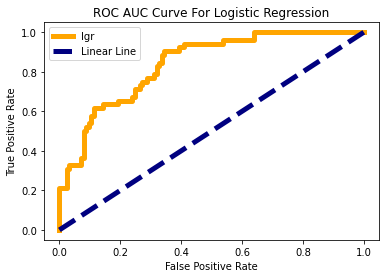

In [119]:
from sklearn.metrics import roc_curve, precision_recall_curve,roc_auc_score, f1_score, confusion_matrix
fpr, tpr, thresholds = roc_curve(y_test,lgr.predict_proba(x_test)[:,1],pos_label=1)
precision, recall, thresholds = precision_recall_curve(y_test,lgr.predict_proba(x_test)[:,1],pos_label=1)
plt.plot(fpr, tpr, label='lgr',lw=5,color="orange")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC Curve For Logistic Regression")
plt.plot([0,1], [0,1], label='Linear Line', color='navy',lw=5,linestyle='--')
plt.legend()

In [120]:
clfLR_data = {'Model': ['Logistic Regression'],            
             'ROC_AUC Score': roc_auc_score_LR,
             'CV Score': clfLR_cvScore
            }

clf_LR_df = pd.DataFrame(clfLR_data)  
clf_LR_df

,Model,ROC_AUC Score,CV Score
0,Logistic Regression,0.876033,0.826275


# KNN Classifier

In [121]:
from sklearn.neighbors import KNeighborsClassifier

In [205]:
max_aucroc_score_knn=0
for i in range(40,100):
    x_train, x_test, y_train, y_test = train_test_split(features,target,test_size=0.20,random_state=i,stratify=target)
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    y_predKnn_proba= knn.predict_proba(x_test)
    roc_auc_score_knn=roc_auc_score(y_test, y_predKnn_proba,multi_class='ovr')
    print("At",i,"aucroc score is ",roc_auc_score_knn)
    if roc_auc_score_knn>max_aucroc_score_knn:
        max_aucroc_score_knn=roc_auc_score_knn
        final_i=i
print("Select the max aucroc score at ",final_i,"which is",max_aucroc_score_knn)

At 40 aucroc score is  0.8376639412729153
At 41 aucroc score is  0.8092004668354554
At 42 aucroc score is  0.8305468784615572
At 43 aucroc score is  0.8233755556769158
At 44 aucroc score is  0.8368415053829829
At 45 aucroc score is  0.7778879973462136
At 46 aucroc score is  0.858783801470747
At 47 aucroc score is  0.7891240495696659
At 48 aucroc score is  0.82036030187375
At 49 aucroc score is  0.8340935885249899
At 50 aucroc score is  0.8141299154192595
At 51 aucroc score is  0.8277782154002278
At 52 aucroc score is  0.7993096287336438
At 53 aucroc score is  0.8410064800762171
At 54 aucroc score is  0.8357354970637242
At 55 aucroc score is  0.8410559333779541
At 56 aucroc score is  0.863355170297037
At 57 aucroc score is  0.7959452104912477
At 58 aucroc score is  0.8169226332921753
At 59 aucroc score is  0.789489142308117
At 60 aucroc score is  0.7757662567648911
At 61 aucroc score is  0.7887402394467632
At 62 aucroc score is  0.8425408701775285
At 63 aucroc score is  0.83816549627098

In [224]:
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size=0.20,random_state=56,stratify=target)
knn=KNeighborsClassifier()

In [225]:
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [226]:
y_pred

array([2, 2, 1, 1, 7, 1, 6, 1, 1, 3, 7, 6, 7, 7, 3, 1, 1, 3, 3, 7, 1, 3,
       6, 6, 7, 1, 0, 7, 1, 0, 5, 3, 1, 7, 3, 6, 6, 3, 1, 1, 0, 3, 3, 7,
       7, 1, 1, 3, 6, 0, 0, 1, 1, 3, 1, 1, 0, 7, 3, 3, 1, 1, 1, 1, 3, 3,
       1, 1, 1, 3, 6, 6, 3, 3, 0, 3, 1, 3, 7, 3, 1, 7, 7, 1, 1, 1, 1, 3,
       1, 1, 7, 1, 6, 1, 3, 2, 7, 0, 2, 0, 0, 6, 6, 6, 1, 1, 1, 1, 6, 5,
       1, 6, 3, 1, 3, 6, 3, 6, 2, 7, 3, 3, 3, 0, 1, 3, 6, 3, 1, 1, 3, 6,
       7, 1, 2, 6, 3, 1, 0, 1, 1, 1, 1, 6, 1, 1, 7, 3, 7, 3, 2, 3, 3, 1,
       6, 6, 1, 2, 3, 3, 3, 1, 3, 3, 6, 3, 3, 3, 1, 1, 0, 1, 0, 0, 1, 1,
       3], dtype=int64)

In [227]:
y_predKnn_proba= knn.predict_proba(x_test)

In [228]:
y_predKnn_proba

array([[0. , 0.2, 0.8, ..., 0. , 0. , 0. ],
       [0. , 0.2, 0.4, ..., 0. , 0. , 0. ],
       [0. , 0.8, 0.2, ..., 0. , 0. , 0. ],
       ...,
       [0.2, 0.4, 0.2, ..., 0. , 0. , 0.2],
       [0. , 0.6, 0.2, ..., 0. , 0. , 0. ],
       [0. , 0. , 0.2, ..., 0. , 0. , 0.4]])

In [229]:
roc_auc_score_knn=roc_auc_score(y_test, y_predKnn_proba,multi_class='ovr')

In [230]:
roc_auc_score_knn

0.8305340117828346

# Cross Validation Score

In [235]:
knn_cv_score=cross_val_score(knn,features,target,cv=5,scoring='roc_auc_ovr').mean()
knn_cv_score

0.8092880074241968

In [236]:
clfKNN_data = {'Model': ['KNeighborsClassifier'],            
             'ROC_AUC Score': roc_auc_score_knn,
             'CV Score': knn_cv_score
            }  

clf_KNN_df = pd.DataFrame(clfKNN_data)  
clf_KNN_df

,Model,ROC_AUC Score,CV Score
0,KNeighborsClassifier,0.830534,0.809288


In [237]:
print("Confusion Matrix\n",'-'*35,"\n",confusion_matrix(y_test,y_pred))

Confusion Matrix
 ----------------------------------- 
 [[ 8  0  0  1  0  1  0  0]
 [ 2 42  1  5  0  0  0  2]
 [ 0  5  3  5  0  0  0  0]
 [ 3 11  3 24  0  1  0  5]
 [ 0  2  0  0  0  0  0  0]
 [ 1  0  1  2  0  0  0  0]
 [ 0  1  0  0  0  0 24  0]
 [ 1  0  0 10  0  0  0 13]]


In [238]:
print("Classification Report","\n",classification_report(y_test,y_pred))

Classification Report 
               precision    recall  f1-score   support

           0       0.53      0.80      0.64        10
           1       0.69      0.81      0.74        52
           2       0.38      0.23      0.29        13
           3       0.51      0.51      0.51        47
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         4
           6       1.00      0.96      0.98        25
           7       0.65      0.54      0.59        24

    accuracy                           0.64       177
   macro avg       0.47      0.48      0.47       177
weighted avg       0.62      0.64      0.63       177



# Decision Tree Classifier

In [139]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(max_depth=3,random_state=i,criterion='gini')

In [140]:
max_aucroc_score=0
for i in range(40,100):
    x_train, x_test, y_train, y_test = train_test_split(features,target,test_size=0.20,random_state=i,stratify=target)
    tree=DecisionTreeClassifier(max_depth=3,random_state=i,criterion='gini')
    tree.fit(x_train,y_train)
    y_pred=tree.predict(x_test)
    y_pred_proba= tree.predict_proba(x_test)
    roc_auc_score_tree=roc_auc_score(y_test, y_pred_proba,multi_class='ovr')
    print("At",i,"aucroc score is ",roc_auc_score_tree)
    if roc_auc_score_tree>max_aucroc_score:
        max_aucroc_score=roc_auc_score_tree
        final_i=i
print("Select the max aucroc score at ",final_i,"which is",max_aucroc_score)

At 40 aucroc score is  0.7826217290384561
At 41 aucroc score is  0.7583667841260773
At 42 aucroc score is  0.7541705461588082
At 43 aucroc score is  0.7899086446721404
At 44 aucroc score is  0.790299476819847
At 45 aucroc score is  0.7545003385142985
At 46 aucroc score is  0.724194008628378
At 47 aucroc score is  0.7479346077956367
At 48 aucroc score is  0.800424402257644
At 49 aucroc score is  0.737923301788243
At 50 aucroc score is  0.7476973459049359
At 51 aucroc score is  0.7737722948740777
At 52 aucroc score is  0.7653101425611207
At 53 aucroc score is  0.775968864150572
At 54 aucroc score is  0.7796708277176012
At 55 aucroc score is  0.7616541454970014
At 56 aucroc score is  0.7512617522732383
At 57 aucroc score is  0.760536262758842
At 58 aucroc score is  0.7234430668705798
At 59 aucroc score is  0.7356177286695107
At 60 aucroc score is  0.7318229352026956
At 61 aucroc score is  0.7561235198055165
At 62 aucroc score is  0.7833426640511798
At 63 aucroc score is  0.785687220570242

In [141]:
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size=0.20,random_state=48,stratify=target)
tree=DecisionTreeClassifier(max_depth=3,random_state=67,criterion='gini')

In [142]:
tree.fit(x_train,y_train)
y_pred=tree.predict(x_test)

In [143]:
y_pred_proba= tree.predict_proba(x_test) # this computes the probablity estimates
y_pred_proba

array([[0.        , 0.75625   , 0.09375   , ..., 0.00625   , 0.        ,
        0.        ],
       [0.10204082, 0.21173469, 0.09183673, ..., 0.03571429, 0.00510204,
        0.24744898],
       [0.        , 0.75625   , 0.09375   , ..., 0.00625   , 0.        ,
        0.        ],
       ...,
       [0.10204082, 0.21173469, 0.09183673, ..., 0.03571429, 0.00510204,
        0.24744898],
       [0.10204082, 0.21173469, 0.09183673, ..., 0.03571429, 0.00510204,
        0.24744898],
       [0.10204082, 0.21173469, 0.09183673, ..., 0.03571429, 0.00510204,
        0.24744898]])

In [144]:
roc_auc_score_tree=roc_auc_score(y_test, y_pred_proba,multi_class='ovr')

In [145]:
roc_auc_score_tree

0.800424402257644

In [146]:
tree_cv_score=cross_val_score(tree,features,target,cv=5,scoring='roc_auc_ovr').mean()

In [147]:
tree_cv_score

0.7415512878143222

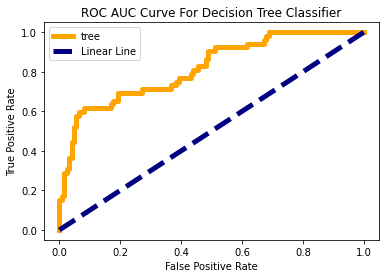

In [148]:
fpr, tpr, thresholds = roc_curve(y_test,lgr.predict_proba(x_test)[:,1],pos_label=1)
precision, recall, thresholds = precision_recall_curve(y_test,lgr.predict_proba(x_test)[:,1],pos_label=1)
plt.plot(fpr, tpr, label='tree',lw=5,color="orange")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC Curve For Decision Tree Classifier")
plt.plot([0,1], [0,1], label='Linear Line', color='navy',lw=5,linestyle='--')
plt.legend()

In [149]:
clfDT_data = {'Model': ['DecisionTreeClassifier'],            
             'ROC_AUC Score': roc_auc_score_tree,
             'CV Score': tree_cv_score
            }  

clf_DT_df = pd.DataFrame(clfDT_data)  
clf_DT_df

,Model,ROC_AUC Score,CV Score
0,DecisionTreeClassifier,0.800424,0.741551


In [150]:
print("Confusion Matrix\n",'-'*35,"\n",confusion_matrix(y_test,y_pred))

Confusion Matrix
 ----------------------------------- 
 [[ 0  0  0 10  0  0  0  0]
 [ 0 32  0 20  0  0  0  0]
 [ 0  5  0  8  0  0  0  0]
 [ 0  3  0 44  0  0  0  0]
 [ 0  2  0  0  0  0  0  0]
 [ 0  0  0  4  0  0  0  0]
 [ 0  0  0  0  0  0 25  0]
 [ 0  0  0 24  0  0  0  0]]


In [151]:
print("Classification Report","\n",classification_report(y_test,y_pred))

Classification Report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.76      0.62      0.68        52
           2       0.00      0.00      0.00        13
           3       0.40      0.94      0.56        47
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         4
           6       1.00      1.00      1.00        25
           7       0.00      0.00      0.00        24

    accuracy                           0.57       177
   macro avg       0.27      0.32      0.28       177
weighted avg       0.47      0.57      0.49       177



# Random Forest Classifier

In [239]:
from sklearn.ensemble import RandomForestClassifier
# creating the model
clf_rf = RandomForestClassifier()
params={'n_estimators':[100,150],
        'criterion':['entropy','ginni'],
        'max_depth':[10,15],
        'min_samples_split':[10,11],
        'min_samples_leaf':[5,6]
        }
params

{'n_estimators': [100, 150],
 'criterion': ['entropy', 'ginni'],
 'max_depth': [10, 15],
 'min_samples_split': [10, 11],
 'min_samples_leaf': [5, 6]}

In [240]:
grd=GridSearchCV(clf_rf,param_grid=params)
grd.fit(x_train,y_train)
print("Best_Params_",grd.best_params_)

Best_Params_ {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 11, 'n_estimators': 150}


In [241]:
max_aucroc_score_forest=0
for i in range(42,100):
    x_train, x_test, y_train, y_test = train_test_split(features,target,test_size=0.20,random_state=i,stratify=target)
    forest=RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=5, min_samples_split=11,n_estimators=150)
    forest.fit(x_train,y_train)
    y_pred=forest.predict(x_test)
    y_pred_proba= forest.predict_proba(x_test)
    roc_auc_score_forest=roc_auc_score(y_test, y_pred_proba,multi_class='ovr')
    print("At",i,"aucroc score is ",roc_auc_score_forest)
    if roc_auc_score_forest>max_aucroc_score_forest:
        max_aucroc_score_forest=roc_auc_score_forest
        final_i=i
print("Select the max aucroc score at ",final_i,"which is",max_aucroc_score_forest)

At 42 aucroc score is  0.8968324233876634
At 43 aucroc score is  0.913224302787391
At 44 aucroc score is  0.9281172765183742
At 45 aucroc score is  0.9186410257511257
At 46 aucroc score is  0.9264151222343118
At 47 aucroc score is  0.9211888422336163
At 48 aucroc score is  0.9423072354762174
At 49 aucroc score is  0.9508687024365947
At 50 aucroc score is  0.9090528977951815
At 51 aucroc score is  0.922824799247683
At 52 aucroc score is  0.9028264264276269
At 53 aucroc score is  0.9484800860361812
At 54 aucroc score is  0.9140625046701928
At 55 aucroc score is  0.9112726059897991
At 56 aucroc score is  0.9487280120860513
At 57 aucroc score is  0.8976531266090718
At 58 aucroc score is  0.9075467167989195
At 59 aucroc score is  0.8986560002550764
At 60 aucroc score is  0.9310100667777845
At 61 aucroc score is  0.8808654267246405
At 62 aucroc score is  0.9166948840290283
At 63 aucroc score is  0.8963977800398583
At 64 aucroc score is  0.914748405575631
At 65 aucroc score is  0.921758215481

In [242]:
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size=0.20,random_state=86,stratify=target)
forest=RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=5, min_samples_split=11,n_estimators=150)

In [243]:
forest.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=5,
                       min_samples_split=11, n_estimators=150)

In [244]:
y_pred=forest.predict(x_test)

In [245]:
y_pred_proba= forest.predict_proba(x_test)

In [246]:
y_pred_proba

array([[1.67034583e-02, 3.17441188e-01, 9.42751581e-02, ...,
        1.62509620e-02, 1.68028974e-02, 2.11316378e-01],
       [0.00000000e+00, 4.44444444e-04, 0.00000000e+00, ...,
        0.00000000e+00, 9.88627558e-01, 1.04151774e-02],
       [4.18722944e-03, 2.91915305e-01, 1.10274133e-01, ...,
        1.07203619e-02, 3.12812678e-02, 1.19616330e-01],
       ...,
       [0.00000000e+00, 8.56650820e-01, 1.00073574e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.01621955e-01, 1.24209023e-01, 2.17077764e-02, ...,
        1.48308571e-02, 4.27559913e-03, 2.58738493e-01],
       [0.00000000e+00, 9.10956747e-01, 1.64906945e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [247]:
roc_auc_score_forest=roc_auc_score(y_test, y_pred_proba,multi_class='ovr')

In [248]:
roc_auc_score_forest

0.9544856759532212

In [256]:
forest_cv_score=cross_val_score(forest,features,target,cv=9,scoring='roc_auc_ovr').mean()
forest_cv_score

0.9200078703882981

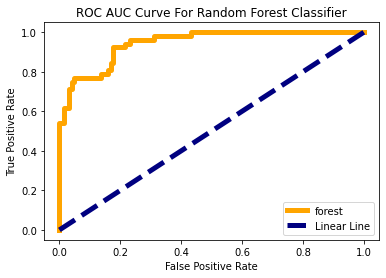

In [257]:
fpr, tpr, thresholds = roc_curve(y_test,forest.predict_proba(x_test)[:,1],pos_label=1)
precision, recall, thresholds = precision_recall_curve(y_test,lgr.predict_proba(x_test)[:,1],pos_label=1)
plt.plot(fpr, tpr, label='forest',lw=5,color="orange")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC Curve For Random Forest Classifier")
plt.plot([0,1], [0,1], label='Linear Line', color='navy',lw=5,linestyle='--')
plt.legend()

In [258]:
clfRF_data = {'Model': ['RandomForestClassifier'],            
             'ROC_AUC Score': roc_auc_score_forest,
             'CV Score': forest_cv_score
            }  

clf_RF_df = pd.DataFrame(clfRF_data)
clf_RF_df

,Model,ROC_AUC Score,CV Score
0,RandomForestClassifier,0.954486,0.920008


In [259]:
print("Confusion Matrix\n",'-'*35,"\n",confusion_matrix(y_test,y_pred))

Confusion Matrix
 ----------------------------------- 
 [[ 6  2  0  2  0  0  0  0]
 [ 2 44  2  2  0  0  0  2]
 [ 0  4  6  2  0  1  0  0]
 [ 2  9  0 31  0  0  0  5]
 [ 0  2  0  0  0  0  0  0]
 [ 0  1  2  0  0  1  0  0]
 [ 0  0  0  0  0  0 25  0]
 [ 2  0  0  3  0  0  0 19]]


In [260]:
print("Classification Report","\n",classification_report(y_test,y_pred))

Classification Report 
               precision    recall  f1-score   support

           0       0.50      0.60      0.55        10
           1       0.71      0.85      0.77        52
           2       0.60      0.46      0.52        13
           3       0.78      0.66      0.71        47
           4       0.00      0.00      0.00         2
           5       0.50      0.25      0.33         4
           6       1.00      1.00      1.00        25
           7       0.73      0.79      0.76        24

    accuracy                           0.75       177
   macro avg       0.60      0.58      0.58       177
weighted avg       0.74      0.75      0.74       177



In [261]:
clf_modelDF=pd.concat([clf_LR_df,clf_KNN_df,clf_DT_df,clf_RF_df]).reset_index()
clf_modelDF.drop(columns=['index'],axis=1,inplace=True)
clf_modelDF

,Model,ROC_AUC Score,CV Score
0,Logistic Regression,0.876033,0.826275
1,KNeighborsClassifier,0.830534,0.809288
2,DecisionTreeClassifier,0.800424,0.741551
3,RandomForestClassifier,0.954486,0.920008


In [262]:
0.954486-0.92008, 0.830534-0.809288

(0.03440599999999994, 0.021245999999999987)

In [265]:
roc_auc_dict = {} #ROC AUC dict for TPR and FPR values
precision_recall_dict = {} #precision recall dictionary

def modify_roc_auc_dict(clf, y_test, x_test, name ,modify_dictionary):
    # Modifies a dictionary in place and adds keys for ROC AUC metrics
    fpr, tpr, thresholds = roc_curve(y_test,clf.predict_proba(x_test)[:,1],pos_label=1)
    clf_roc_auc_dict = {'fpr':fpr, 'tpr': tpr, 'thresholds': thresholds}
    modify_dictionary[name] = clf_roc_auc_dict
    
def modify_precision_recall_dict(clf, y_test, x_test, name ,modify_dictionary):
    # Modifies a dictionary in place and adds keys for precision recall metrics
    precision, recall, thresholds = precision_recall_curve(y_test,clf.predict_proba(x_test)[:,1],pos_label=1)
    precision_recall_dict = {'precision':precision, 'recall': recall, 'thresholds': thresholds}
    modify_dictionary[name] = precision_recall_dict

In [266]:
def fit_clf(clf, x_train, y_train, x_test, y_test, name='clf'): 
    clf.fit(x_train, y_train) 
    y_pred = clf.predict(x_test)
    class_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
    class_report['clf'] = name 
    return class_report

In [267]:
lgr_report = fit_clf(lgr, x_train, y_train, x_test, y_test, name='Logistic Regression')
lgr_report.head()

,0,1,2,3,4,5,6,7,accuracy,macro avg,weighted avg,clf
precision,0.0,0.583333,0.0,0.406250,0.0,0.0,1.0,0.357143,0.542373,0.293341,0.468918,Logistic Regression
recall,0.0,0.673077,0.0,0.553191,0.0,0.0,1.0,0.416667,0.542373,0.330367,0.542373,Logistic Regression
f1-score,0.0,0.625000,0.0,0.468468,0.0,0.0,1.0,0.384615,0.542373,0.309760,0.501406,Logistic Regression
support,10.0,52.000000,13.0,47.000000,2.0,4.0,25.0,24.000000,0.542373,177.000000,177.000000,Logistic Regression


In [268]:
knn_report = fit_clf(knn, x_train, y_train, x_test, y_test, name='KNeighborsClassifier')
knn_report.head()

,0,1,2,3,4,5,6,7,accuracy,macro avg,weighted avg,clf
precision,0.333333,0.606061,0.384615,0.702703,0.0,0.0,1.000000,0.500000,0.621469,0.440839,0.620766,KNeighborsClassifier
recall,0.500000,0.769231,0.384615,0.553191,0.0,0.0,0.960000,0.416667,0.621469,0.447963,0.621469,KNeighborsClassifier
f1-score,0.400000,0.677966,0.384615,0.619048,0.0,0.0,0.979592,0.454545,0.621469,0.439471,0.614398,KNeighborsClassifier
support,10.000000,52.000000,13.000000,47.000000,2.0,4.0,25.000000,24.000000,0.621469,177.000000,177.000000,KNeighborsClassifier


In [269]:
tree_report = fit_clf(tree, x_train, y_train, x_test, y_test, name='DecisionTreeClassifier')
tree_report.head()

,0,1,2,3,4,5,6,7,accuracy,macro avg,weighted avg,clf
precision,0.0,0.794872,0.0,0.380531,0.0,0.0,1.0,0.0,0.559322,0.271925,0.475810,DecisionTreeClassifier
recall,0.0,0.596154,0.0,0.914894,0.0,0.0,1.0,0.0,0.559322,0.313881,0.559322,DecisionTreeClassifier
f1-score,0.0,0.681319,0.0,0.537500,0.0,0.0,1.0,0.0,0.559322,0.277352,0.484130,DecisionTreeClassifier
support,10.0,52.000000,13.0,47.000000,2.0,4.0,25.0,24.0,0.559322,177.000000,177.000000,DecisionTreeClassifier


In [270]:
forest_report = fit_clf(forest, x_train, y_train, x_test, y_test, name='RandomForestClassifier')
forest_report.head()

,0,1,2,3,4,5,6,7,accuracy,macro avg,weighted avg,clf
precision,0.5,0.721311,0.583333,0.738095,0.0,0.500000,1.0,0.800000,0.751412,0.605343,0.740011,RandomForestClassifier
recall,0.5,0.846154,0.538462,0.659574,0.0,0.250000,1.0,0.833333,0.751412,0.578440,0.751412,RandomForestClassifier
f1-score,0.5,0.778761,0.560000,0.696629,0.0,0.333333,1.0,0.816327,0.751412,0.585631,0.742612,RandomForestClassifier
support,10.0,52.000000,13.000000,47.000000,2.0,4.000000,25.0,24.000000,0.751412,177.000000,177.000000,RandomForestClassifier


In [271]:
#Lets Check the Keys which we have
roc_auc_dict.keys()

dict_keys([])

In [272]:
modify_roc_auc_dict(clf=lgr,y_test=y_test,x_test=x_test,name='LogisticRegresssion',modify_dictionary=roc_auc_dict)
modify_roc_auc_dict(clf=knn,y_test=y_test,x_test=x_test,name='KNeighborsClassifier',modify_dictionary=roc_auc_dict)
modify_roc_auc_dict(clf=tree,y_test=y_test,x_test=x_test,name='DecisionTreeClassifier',modify_dictionary=roc_auc_dict)
modify_roc_auc_dict(clf=forest,y_test=y_test,x_test=x_test,name='RandomForestClassifier',modify_dictionary=roc_auc_dict)

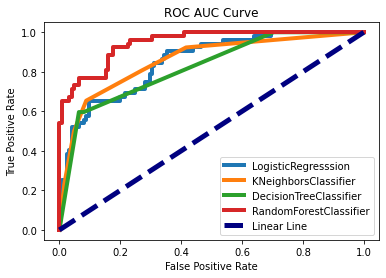

In [273]:
for key in roc_auc_dict:
    clf = roc_auc_dict[key]
    plt.plot(clf['fpr'], clf['tpr'], label=key,lw=4)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC Curve")
plt.plot([0,1], [0,1], label='Linear Line', color='navy',lw=5,linestyle='--')
plt.legend()
plt.show()

In [275]:
#Predicting the test cases
predict_GlobalPowerPlant =   pd.DataFrame({ 'actual':  y_test,
                                      'predicted': knn.predict( x_test),
                                      'Correctly_Predicted':(y_test)-(knn.predict(x_test))
                                    })
predict_GlobalPowerPlant

,actual,predicted,Correctly_Predicted
0,1,1,0
1,6,6,0
2,1,3,-2
3,3,7,-4
4,6,6,0
...,...,...,...
172,3,0,3
173,0,7,-7
174,1,1,0
175,7,0,7


In [276]:
predict_GlobalPowerPlant = predict_GlobalPowerPlant.reset_index()

In [277]:
predict_GlobalPowerPlant['Correctly_Predicted'].value_counts()

 0    110
 2     11
 1      9
 4      6
 6      6
 3      6
-2      5
-4      5
-1      5
 5      4
-6      4
-3      3
 7      2
-7      1
Name: Correctly_Predicted, dtype: int64

<AxesSubplot:xlabel='Correctly_Predicted', ylabel='count'>

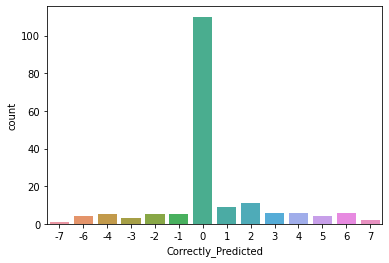

In [278]:
sns.countplot(predict_GlobalPowerPlant.Correctly_Predicted)

<AxesSubplot:xlabel='Correctly_Predicted', ylabel='Count'>

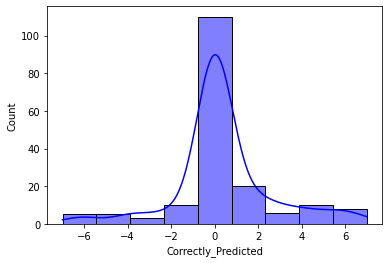

In [279]:
sns.histplot(predict_GlobalPowerPlant.Correctly_Predicted,color="blue",kde=True,stat="count")

# Model Selection

Out of the above models evaluated, we see that the difference between roc_auc score and CV score is least for KNN Classifier.Also when we plot the graph, we see that it is normally distributed and out of 177 records, 150 got predicted well.So our model's accuracy is 84.74% Hence KNN Classsfier is performing well.

# Save KNeighbors as our model for Predicting power_fuel

In [280]:
from joblib import dump , load
dump(forest,'GlobalPowerPlant.joblib')
forest_load=load('GlobalPowerPlant.joblib')

In [281]:
from tempfile import mkdtemp
savedir = mkdtemp()
import os
filename = os.path.join(savedir, 'GlobalPowerPlant.joblib')

In [282]:
import joblib
joblib.dump(forest, filename) 

['C:\\Users\\mum1user\\AppData\\Local\\Temp\\tmpt75kil5n\\GlobalPowerPlant.joblib']

In [283]:
joblib.load(filename)

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=5,
                       min_samples_split=11, n_estimators=150)

# Second Problem
 
- Predict capacity_mw

In [366]:
features=df.drop(['capacity_mw'], axis=1)
target=df[['capacity_mw']]

In [367]:
features.shape , target.shape

((882, 4), (882, 1))

# Feature Importance

In [368]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
feature_rf = RandomForestRegressor()
feature_rf.fit(features,target)
print(feature_rf.feature_importances_)

[0.24966565 0.25062515 0.47868929 0.02101991]


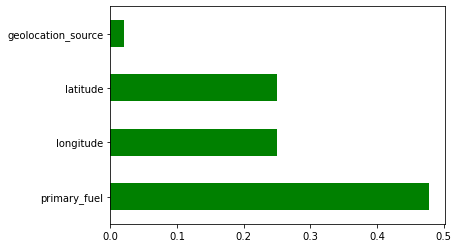

In [369]:
#plot graph of feature importances for better visualization
featureImportance = pd.Series(feature_rf.feature_importances_, index=features.columns)
featureImportance.nlargest(8).plot(kind='barh',color="green")
plt.show()

So the most important feature to predict the capacity_vw is the primary fuel

In [370]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

In [371]:
lr=LinearRegression()
max_r2_score=0
for i in range(40,101):
    x_train, x_test, y_train, y_test = train_test_split(features,target,test_size=0.20,random_state = i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    r2=r2_score(y_test,pred_test)
    print("*"*30)
    print("At",i,"r2_score is: ",r2)
    if r2>max_r2_score:
        max_r2_score=r2
        final_i=i
print("*"*30)
print("Best r2_score at ",final_i," is : ",max_r2_score)

******************************
At 40 r2_score is:  0.3674722895112261
******************************
At 41 r2_score is:  0.33944403023229497
******************************
At 42 r2_score is:  0.331157428386576
******************************
At 43 r2_score is:  0.4527432429563184
******************************
At 44 r2_score is:  0.3467890201652425
******************************
At 45 r2_score is:  0.38872666538316913
******************************
At 46 r2_score is:  0.3269528168896406
******************************
At 47 r2_score is:  0.350402437565175
******************************
At 48 r2_score is:  0.44630482534212657
******************************
At 49 r2_score is:  0.3296512043068961
******************************
At 50 r2_score is:  0.39190924040028674
******************************
At 51 r2_score is:  0.2634774865760311
******************************
At 52 r2_score is:  0.3469844430726017
******************************
At 53 r2_score is:  0.3569791391570508
******************

In [373]:
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size=0.20,random_state = 78)
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)
r2_final_score=r2_score(y_test,pred_test)
r2_final_score

0.4643004615303671

In [374]:
from sklearn import metrics
# calculate MAE, MSE, RMSE on Train Data
print ("mean_absolute_error :",metrics.mean_absolute_error(y_train, pred_train))
print ("mean_squared_error : ",metrics.mean_squared_error(y_train, pred_train))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_train, pred_train)))

mean_absolute_error : 1.2836254381483616
mean_squared_error :  2.3125516969527298
root_mean_squared_error :  1.5207076303329086


In [375]:
# calculate MAE, MSE, RMSE on Test Data
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, pred_test))
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, pred_test))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, pred_test)))

mean_absolute_error : 1.1235352932988132
mean_squared_error :  1.8712689573115138
root_mean_squared_error :  1.3679433311769584


In [376]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import absolute

In [392]:
lsScore_selected=cross_val_score(lr,features,target,cv=4).mean()
print("The CV score is :",lsScore_selected)

The CV score is : 0.36196281142553166


In [393]:
lr_data = {'Model': ['Linear Regression'], 
           'MAE': metrics.mean_absolute_error(y_test, pred_test),'MSE':metrics.mean_squared_error(y_test, pred_test),
           'RMSE':np.sqrt(metrics.mean_squared_error(y_test, pred_test)),
           'R2 Score': r2_final_score,
           'CV Score': lsScore_selected
          }

df_LR = pd.DataFrame(lr_data)
df_LR

,Model,MAE,MSE,RMSE,R2 Score,CV Score
0,Linear Regression,1.123535,1.871269,1.367943,0.4643,0.361963


# Regularization Techniques
Once we use linear regression on a data-set divided in to training and test set, calculating the scores on training and test set can give us a rough idea about whether the model is suffering from over-fitting or under-fitting.

If we have very few features on a data-set and the score is poor for both training and test set then it’s a problem of under-fitting. On the other hand if we have large number of features and test score is relatively poor than the training score then it’s the problem of over-fitting.

Regularization is a simple technique to reduce model complexity and prevent over-fitting which may result from simple linear regression.

# Ridge

In [394]:
from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha=0.1,max_iter=20, normalize=True)

max_r2_score=0
for i in range(40,101):
    x_train, x_test, y_train, y_test = train_test_split(features,target,test_size=0.20,random_state = i)
    ridgeReg.fit(x_train,y_train)
    ridge_pred_train=ridgeReg.predict(x_train)
    ridge_pred=ridgeReg.predict(x_test)
    r2=r2_score(y_test,ridge_pred)
    print("*"*30)
    print("At",i,"r2_score is: ",r2)
    if r2>max_r2_score:
        max_r2_score=r2
        final_i=i
print("*"*30)
print("Best r2_score at ",final_i," is : ",max_r2_score)

******************************
At 40 r2_score is:  0.3688095789710597
******************************
At 41 r2_score is:  0.34551761851217877
******************************
At 42 r2_score is:  0.3251876377238643
******************************
At 43 r2_score is:  0.4434572110142263
******************************
At 44 r2_score is:  0.3444546411525249
******************************
At 45 r2_score is:  0.38714953279427966
******************************
At 46 r2_score is:  0.3251710382783015
******************************
At 47 r2_score is:  0.3484188362477578
******************************
At 48 r2_score is:  0.44433843440520737
******************************
At 49 r2_score is:  0.33036721541930125
******************************
At 50 r2_score is:  0.3913963932918555
******************************
At 51 r2_score is:  0.27387055087050993
******************************
At 52 r2_score is:  0.34622353720641763
******************************
At 53 r2_score is:  0.35897449308123064
*************

In [395]:
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size=0.20,random_state = 78)
ridgeReg.fit(x_train,y_train)
ridge_pred = ridgeReg.predict(x_test)
ridge_pred_train = ridgeReg.predict(x_train)
r2_final_score=r2_score(y_test,ridge_pred)

In [401]:
ridge_cvScore=cross_val_score(ridgeReg,features,target,cv=4).mean()
print("The CV score is :",ridge_cvScore)

The CV score is : 0.36160099798030554


In [402]:
#Test Data
print("r2_score",r2_final_score)
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, ridge_pred))
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, ridge_pred))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, ridge_pred)))
print("Cross Validation Score : ",ridge_cvScore)

r2_score 0.4562306022400143
mean_absolute_error : 1.1413586348111353
mean_squared_error :  1.8994580373750296
root_mean_squared_error :  1.3782082706815504
Cross Validation Score :  0.36160099798030554


In [403]:
# Train Data
print("r2_score",r2_final_score)
print ("mean_absolute_error :",metrics.mean_absolute_error(y_train, ridge_pred_train))
print ("mean_squared_error : ",metrics.mean_squared_error(y_train, ridge_pred_train))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_train, ridge_pred_train)))
print ("Cross Validation Score : ", ridge_cvScore)

r2_score 0.4562306022400143
mean_absolute_error : 1.2889107315039174
mean_squared_error :  2.3172340875845285
root_mean_squared_error :  1.522246395162271
Cross Validation Score :  0.36160099798030554


In [404]:
ridge_data = {'Model': ['Ridge'], 
           'MAE': metrics.mean_absolute_error(y_test, ridge_pred),'MSE':metrics.mean_squared_error(y_test, ridge_pred),
           'RMSE':np.sqrt(metrics.mean_squared_error(y_test, ridge_pred)),
           'R2 Score': r2_final_score,
           'CV Score': ridge_cvScore
             }  

df_Ridge = pd.DataFrame(ridge_data)  
df_Ridge

,Model,MAE,MSE,RMSE,R2 Score,CV Score
0,Ridge,1.141359,1.899458,1.378208,0.456231,0.361601


# KNeighborsRegressor

In [420]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5,weights='uniform',algorithm='kd_tree',leaf_size=3)

max_r2_score=0
for i in range(40,101):
    x_train, x_test, y_train, y_test = train_test_split(features,target,test_size=0.20,random_state = i)
    knn.fit(x_train,y_train)
    
    knn_pred_train=knn.predict(x_train)
    knn_pred=knn.predict(x_test)
    
    r2=r2_score(y_test,knn_pred)
    
    print("*"*30)
    print("At",i,"r2_score is: ",r2)
    if r2>max_r2_score:
        max_r2_score=r2
        final_i=i
print("*"*30)
print("Best r2_score at ",final_i," is : ",max_r2_score)

******************************
At 40 r2_score is:  0.42456303383369953
******************************
At 41 r2_score is:  0.46564965652118406
******************************
At 42 r2_score is:  0.4545445736392377
******************************
At 43 r2_score is:  0.5322331912720499
******************************
At 44 r2_score is:  0.4970799798525134
******************************
At 45 r2_score is:  0.432105199170442
******************************
At 46 r2_score is:  0.4759217475473324
******************************
At 47 r2_score is:  0.42099847415844616
******************************
At 48 r2_score is:  0.42666045836539324
******************************
At 49 r2_score is:  0.3840526792024638
******************************
At 50 r2_score is:  0.4784026290579667
******************************
At 51 r2_score is:  0.28355698726736467
******************************
At 52 r2_score is:  0.4508433086733463
******************************
At 53 r2_score is:  0.4079015376194821
****************

In [421]:
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size=0.20,random_state =43)
knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)
knn_pred_train = knn.predict(x_train)
r2_final_score=r2_score(y_test,knn_pred)
r2_final_score

0.5322331912720499

In [422]:
pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=5,weights='uniform',algorithm='kd_tree',leaf_size=3))
#
# Pass instance of pipeline and training and test data set
# cv=5 represents the StratifiedKFold with 5 folds
#
scores = cross_val_score(pipeline, X=x_train, y=y_train, cv=5, n_jobs=1) 

print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))
knn_cvScore=(np.mean(scores))
knn_cvScore

Cross Validation accuracy: 0.490 +/- 0.040


0.4904750545306033

In [423]:
#Test Data
print("r2_score",r2_final_score)
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, knn_pred))
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, knn_pred))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, knn_pred)))
print("Cross Validation Score : ",knn_cvScore)

r2_score 0.5322331912720499
mean_absolute_error : 1.054838528296915
mean_squared_error :  1.8415753235239867
root_mean_squared_error :  1.3570465443469457
Cross Validation Score :  0.4904750545306033


In [424]:
#Train Data
print("r2_score",r2_final_score)
print ("mean_absolute_error :",metrics.mean_absolute_error(y_train, knn_pred_train))
print ("mean_squared_error : ",metrics.mean_squared_error(y_train, knn_pred_train))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_train, knn_pred_train)))
print("Cross Validation Score : ",knn_cvScore)

r2_score 0.5322331912720499
mean_absolute_error : 0.8859060880553223
mean_squared_error :  1.3161105372007655
root_mean_squared_error :  1.147218609159024
Cross Validation Score :  0.4904750545306033


In [425]:
knn_data = {'Model': ['KNN'], 
           'MAE': metrics.mean_absolute_error(y_test, knn_pred),'MSE':metrics.mean_squared_error(y_test, knn_pred),
           'RMSE':np.sqrt(metrics.mean_squared_error(y_test, knn_pred)),
           'R2 Score': r2_final_score,
           'CV Score': knn_cvScore
           }  

df_knn = pd.DataFrame(knn_data)  
df_knn

,Model,MAE,MSE,RMSE,R2 Score,CV Score
0,KNN,1.054839,1.841575,1.357047,0.532233,0.490475


# Decisoin Tree Regressor

In [426]:
from sklearn.tree import DecisionTreeRegressor
dr=DecisionTreeRegressor(criterion="mae",max_features="auto",splitter="best",min_samples_split= 10)

In [427]:
max_r2_score=0
for i in range(40,101):
    x_train, x_test, y_train, y_test = train_test_split(features,target,test_size=0.20,random_state = i)
    dr.fit(x_train,y_train)
    dr_pred_train=dr.predict(x_train)
    dr_pred=dr.predict(x_test)
    r2=r2_score(y_test,dr_pred)
    print("*"*30)
    print("At",i,"r2_score is: ",r2)
    if r2>max_r2_score:
        max_r2_score=r2
        final_i=i
print("*"*30)
print("Best r2_score at ",final_i," is : ",max_r2_score)

******************************
At 40 r2_score is:  0.26283148796382516
******************************
At 41 r2_score is:  0.37961577572008265
******************************
At 42 r2_score is:  0.3875936692927717
******************************
At 43 r2_score is:  0.35916861822707624
******************************
At 44 r2_score is:  0.3832641168190537
******************************
At 45 r2_score is:  0.44536051878635696
******************************
At 46 r2_score is:  0.40041822250371195
******************************
At 47 r2_score is:  0.3864502799741437
******************************
At 48 r2_score is:  0.34553450778336925
******************************
At 49 r2_score is:  0.32728982519319694
******************************
At 50 r2_score is:  0.36433165248695254
******************************
At 51 r2_score is:  0.20267706686979736
******************************
At 52 r2_score is:  0.4575529318710525
******************************
At 53 r2_score is:  0.37222594927763686
**********

In [428]:
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size=0.20,random_state =87)
dr.fit(x_train,y_train)
dr_pred = dr.predict(x_test)
dr_pred_train = dr.predict(x_train)
r2_final_score=r2_score(y_test,dr_pred)
r2_final_score

0.5162016617423636

In [433]:
pipeline = make_pipeline(StandardScaler(),DecisionTreeRegressor(criterion="mae",max_features="auto",splitter="best",min_samples_split= 10))
#
# Pass instance of pipeline and training and test data set
# cv=5 represents the StratifiedKFold with 5 folds
#
tree_scores = cross_val_score(pipeline, X=x_train, y=y_train, cv=5, n_jobs=1) 

print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(tree_scores),np.std(tree_scores)))
tree_cvScore=(np.mean(scores))
tree_cvScore

Cross Validation accuracy: 0.271 +/- 0.052


0.4904750545306033

In [434]:
#Test Data
print("r2_score",r2_final_score)
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, dr_pred))
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, dr_pred))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, dr_pred)))
print("Cross Validation Score : ",tree_cvScore)

r2_score 0.5162016617423636
mean_absolute_error : 1.0210702754973067
mean_squared_error :  1.79580750307346
root_mean_squared_error :  1.3400774242831868
Cross Validation Score :  0.4904750545306033


In [435]:
# Train Data
print("r2_score",r2_final_score)
print ("mean_absolute_error :",metrics.mean_absolute_error(y_train, dr_pred_train))
print ("mean_squared_error : ",metrics.mean_squared_error(y_train, dr_pred_train))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_train, dr_pred_train)))
print ("Cross Validation Score : ", tree_cvScore)

r2_score 0.5162016617423636
mean_absolute_error : 0.5101559836989635
mean_squared_error :  0.7320190561310492
root_mean_squared_error :  0.8555811218879535
Cross Validation Score :  0.4904750545306033


In [436]:
decisionTree_data = {'Model': ['Decision Tree Regressor'], 
           'MAE': metrics.mean_absolute_error(y_test, dr_pred),'MSE':metrics.mean_squared_error(y_test, dr_pred),
           'RMSE':np.sqrt(metrics.mean_squared_error(y_test, dr_pred)),
           'R2 Score': r2_score(y_test,dr_pred),
           'CV Score': tree_cvScore
            }  

df_DT = pd.DataFrame(decisionTree_data)  
df_DT

,Model,MAE,MSE,RMSE,R2 Score,CV Score
0,Decision Tree Regressor,1.02107,1.795808,1.340077,0.516202,0.490475


# Support Vector Regressor

In [437]:
from sklearn.svm import SVR
svr = SVR(gamma='scale',kernel='rbf',shrinking=True,C=1.0)

In [438]:
max_r2_score=0
for i in range(40,101):
    x_train, x_test, y_train, y_test = train_test_split(features,target,test_size=0.20,random_state = i)
    svr.fit(x_train,y_train)
    svr_pred_train=svr.predict(x_train)
    svr_pred=svr.predict(x_test)
    r2=r2_score(y_test,svr_pred)
    print("*"*30)
    print("At",i,"r2_score is: ",r2)
    if r2>max_r2_score:
        max_r2_score=r2
        final_i=i
print("*"*30)
print("Best r2_score at ",final_i," is : ",max_r2_score)

******************************
At 40 r2_score is:  0.33904034285114504
******************************
At 41 r2_score is:  0.34302671206428603
******************************
At 42 r2_score is:  0.3055785953739477
******************************
At 43 r2_score is:  0.4615848929819788
******************************
At 44 r2_score is:  0.3446847273205029
******************************
At 45 r2_score is:  0.4104091292078743
******************************
At 46 r2_score is:  0.3127695889055332
******************************
At 47 r2_score is:  0.325504290038263
******************************
At 48 r2_score is:  0.4257409925195118
******************************
At 49 r2_score is:  0.3237488578788369
******************************
At 50 r2_score is:  0.3540948900148826
******************************
At 51 r2_score is:  0.2214113360329908
******************************
At 52 r2_score is:  0.34984078457444256
******************************
At 53 r2_score is:  0.36001646150565625
*****************

In [439]:
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size=0.20,random_state = 43)
svr.fit(x_train,y_train)
svr_pred = svr.predict(x_test)
svr_pred_train = svr.predict(x_train)
r2_final_score=r2_score(y_test,svr_pred)

In [440]:
pipeline = make_pipeline(StandardScaler(), SVR(gamma='scale',kernel='rbf',shrinking=True,C=1.0))
#
# Pass instance of pipeline and training and test data set
# cv=5 represents the StratifiedKFold with 5 folds
#
scores = cross_val_score(pipeline, X=x_train, y=y_train, cv=5, n_jobs=1) 

print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))
svr_cvScore=(np.mean(scores))
svr_cvScore

Cross Validation accuracy: 0.434 +/- 0.038


0.43351250864257534

In [441]:
#Test Data
print("r2_score",r2_final_score)
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, svr_pred))
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, svr_pred))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, svr_pred)))
print("Cross Validation Score : ",svr_cvScore)

r2_score 0.4615848929819788
mean_absolute_error : 1.2356079472694041
mean_squared_error :  2.1197142601744163
root_mean_squared_error :  1.455923851090577
Cross Validation Score :  0.43351250864257534


In [442]:
# Train Data
print("r2_score",r2_final_score)
print ("mean_absolute_error :",metrics.mean_absolute_error(y_train, svr_pred_train))
print ("mean_squared_error : ",metrics.mean_squared_error(y_train, svr_pred_train))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_train, svr_pred_train)))
print ("Cross Validation Score : ", svr_cvScore)

r2_score 0.4615848929819788
mean_absolute_error : 1.2521819290074132
mean_squared_error :  2.2487184112342296
root_mean_squared_error :  1.4995727428951986
Cross Validation Score :  0.43351250864257534


In [443]:
svr_data = {'Model': ['SVR'], 
           'MAE': metrics.mean_absolute_error(y_test, svr_pred),'MSE':metrics.mean_squared_error(y_test, svr_pred),
           'RMSE':np.sqrt(metrics.mean_squared_error(y_test, svr_pred)),
           'R2 Score': r2_final_score,
           'CV Score': svr_cvScore}  

df_SVR = pd.DataFrame(svr_data)  
df_SVR

,Model,MAE,MSE,RMSE,R2 Score,CV Score
0,SVR,1.235608,2.119714,1.455924,0.461585,0.433513


# Random Forest Regressor

In [444]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(criterion="mae",max_features="auto",n_estimators=10,min_samples_split=5,min_samples_leaf=2)

In [445]:
max_r2_score=0
for i in range(45,95):
    x_train, x_test, y_train, y_test = train_test_split(features,target,test_size=0.20,random_state = i)
    rfr.fit(x_train,y_train)
    rfr_pred_train=rfr.predict(x_train)
    rfr_pred=rfr.predict(x_test)
    r2=r2_score(y_test,rfr_pred)
    print("*"*30)
    print("At",i,"r2_score is: ",r2)
    if r2>max_r2_score:
        max_r2_score=r2
        final_i=i
print("*"*30)
print("Best r2_score at ",final_i," is : ",max_r2_score)

******************************
At 45 r2_score is:  0.5499111866641002
******************************
At 46 r2_score is:  0.6023648376916753
******************************
At 47 r2_score is:  0.5775501516710168
******************************
At 48 r2_score is:  0.49402689267667
******************************
At 49 r2_score is:  0.5015287285829733
******************************
At 50 r2_score is:  0.48274036601140036
******************************
At 51 r2_score is:  0.3900334940249677
******************************
At 52 r2_score is:  0.5598690967649051
******************************
At 53 r2_score is:  0.5549050133810033
******************************
At 54 r2_score is:  0.5187759993630598
******************************
At 55 r2_score is:  0.585752927779606
******************************
At 56 r2_score is:  0.5477087359613191
******************************
At 57 r2_score is:  0.4753046917971159
******************************
At 58 r2_score is:  0.5434825838809305
**********************

In [446]:
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size=0.20,random_state = 87)
rfr=RandomForestRegressor(criterion="mae",max_features="auto",n_estimators=10,min_samples_split=5,min_samples_leaf=2)
rfr.fit(x_train,y_train)
rfr_pred = rfr.predict(x_test)
rfr_pred_train = rfr.predict(x_train)
r2_final_score=r2_score(y_test,rfr_pred)
r2_final_score

0.6333955458670996

In [458]:
rfr_cvScore=cross_val_score(rfr,features,target,cv=8).mean()
rfr_cvScore

0.5174628668515532

In [459]:
#Test Data
print("r2_score",r2_final_score)
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, rfr_pred))
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, rfr_pred))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, rfr_pred)))
print("Cross Validation Score : ",rfr_cvScore)

r2_score 0.6333955458670996
mean_absolute_error : 0.939943550824677
mean_squared_error :  1.3607963842187114
root_mean_squared_error :  1.1665317759147031
Cross Validation Score :  0.5174628668515532


In [460]:
# Train Data
print("r2_score",r2_final_score)
print ("mean_absolute_error :",metrics.mean_absolute_error(y_train, rfr_pred_train))
print ("mean_squared_error : ",metrics.mean_squared_error(y_train, rfr_pred_train))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_train, rfr_pred_train)))
print ("Cross Validation Score : ", rfr_cvScore)

r2_score 0.6333955458670996
mean_absolute_error : 0.6623017302652395
mean_squared_error :  0.7951660796463578
root_mean_squared_error :  0.8917208529839132
Cross Validation Score :  0.5174628668515532


In [461]:
randomForest_data = {'Model': ['Random Forest'], 
           'MAE': metrics.mean_absolute_error(y_test, rfr_pred),'MSE':metrics.mean_squared_error(y_test, rfr_pred),
           'RMSE':np.sqrt(metrics.mean_squared_error(y_test, rfr_pred)),
           'R2 Score': r2_score(y_test,rfr_pred),
           'CV Score': rfr_cvScore
            }  

df_RF = pd.DataFrame(randomForest_data)  
df_RF

,Model,MAE,MSE,RMSE,R2 Score,CV Score
0,Random Forest,0.939944,1.360796,1.166532,0.633396,0.517463


In [462]:
modelDF=pd.concat([df_LR,df_Ridge,df_knn,df_DT,df_SVR,df_RF]).reset_index()
modelDF.drop(columns=['index'],axis=1,inplace=True)
modelDF

,Model,MAE,MSE,RMSE,R2 Score,CV Score
0,Linear Regression,1.123535,1.871269,1.367943,0.464300,0.361963
1,Ridge,1.141359,1.899458,1.378208,0.456231,0.361601
2,KNN,1.054839,1.841575,1.357047,0.532233,0.490475
3,Decision Tree Regressor,1.021070,1.795808,1.340077,0.516202,0.490475
4,SVR,1.235608,2.119714,1.455924,0.461585,0.433513
5,Random Forest,0.939944,1.360796,1.166532,0.633396,0.517463


The difference between R2 Score and CV Score is least for Decision Tree Regressor , Hence we will select this model to predict the capacity_mw (electrical generating capacity in megawatts). Also we see there are many missing data in most of the columns.

# Save the Model

In [463]:
from joblib import dump , load
dump(dr,'PredictCapacity_mw.joblib')
tree_load=load('PredictCapacity_mw.joblib')

In [464]:
from tempfile import mkdtemp
savedir = mkdtemp()
import os
filename = os.path.join(savedir, 'PredictCapacity_mw.joblib')

In [465]:
import joblib
joblib.dump(dr, filename) 
#['...PredictCapacity_mw.joblib']

['C:\\Users\\mum1user\\AppData\\Local\\Temp\\tmp3x7ia90w\\PredictCapacity_mw.joblib']

In [466]:
joblib.load(filename)

DecisionTreeRegressor(criterion='mae', max_features='auto',
                      min_samples_split=10)